# L'objectif de ce notebook est d'entraîner des modèles d'IA pour faire de la prédiction sur nos données. Dans notre cas, les attaques terroristes.

### Import des librairies

In [78]:
# Imports de toutes les librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.neural_network import MLPRegressor

### Préparation des données

In [79]:
# Charger le fichier CSV
data = pd.read_csv("Trait2.csv", sep=",",low_memory=False)

# Remplacer les valeurs manquantes
data.fillna(0, inplace=True)

#Création d'un label encoder par colonne catégorielle
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        # Création d'un label encoder pour la colonne, sauvegarde dans le dictionnaire
        label_encoders[col] = LabelEncoder()
        # Entraînement du label encoder sur les données de la colonne
        label_encoders[col].fit(data[col].astype(str))
        # Remplacement des données de la colonne par les données encodées
        data[col] = label_encoders[col].transform(data[col].astype(str))


### Premier modèle de prédiction, une random forest visant à prédire le nombre de morts et de blessés dans une attaque

In [80]:
# Sélectionner les colonnes pour l'entrée (X) et la sortie (y)
colonnes_X = ['iyear', 'imonth', 'iday', 'extended', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'nperps', 'claimed', 'weaptype1_txt', 'weapsubtype1_txt']
colonnes_y = ['nkill', 'nwound']

data_X = data[colonnes_X].copy()
data_y = data[colonnes_y]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

# Entraîner le modèle de forêt aléatoire
rf = RandomForestRegressor(n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_features="log2", max_depth=None)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Grille des hyperparamètres à explorer
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 3, 5],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# Initialiser le modèle de forêt aléatoire
# rf = RandomForestRegressor(random_state=42)

# # Utiliser RandomizedSearchCV pour rechercher les meilleurs hyperparamètres
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Adapter la recherche aléatoire aux données d'entraînement
# random_search.fit(X_train, y_train)

# # Afficher les meilleurs hyperparamètres trouvés
# print("Best hyperparameters found: ", random_search.best_params_)

# # Utiliser le meilleur modèle trouvé pour effectuer des prédictions
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_test)



#### Evaluation du modèle et affichage des résultats

Mean Squared Error: 596.2878308866873
Mean Absolute Error: 2.6876815018378406
R-squared: 0.005971255498524786
Root Mean Squared Error: 24.41900552616112
Mean Absolute Percentage Error: nkill     6.054015e+11
nwound    1.040174e+12
dtype: float64


c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\diasa\AppData\Local\Temp\ipykernel_12740\1308407961.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


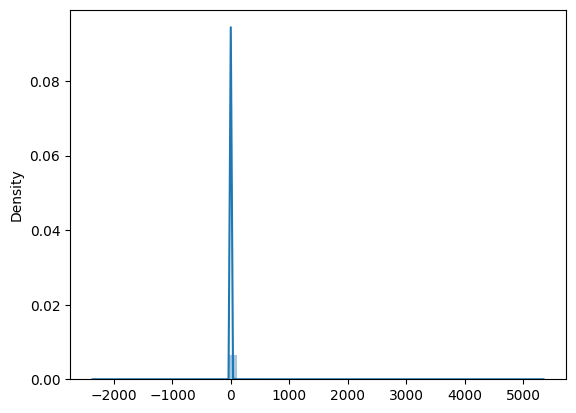

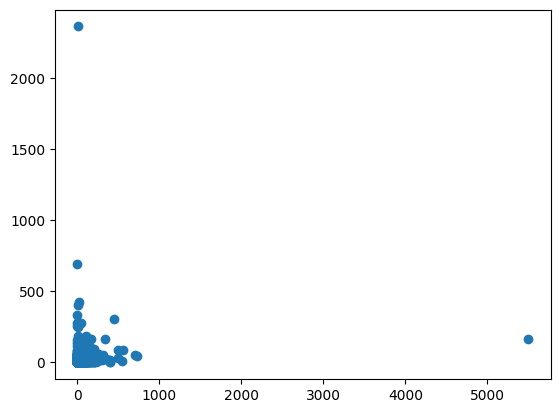

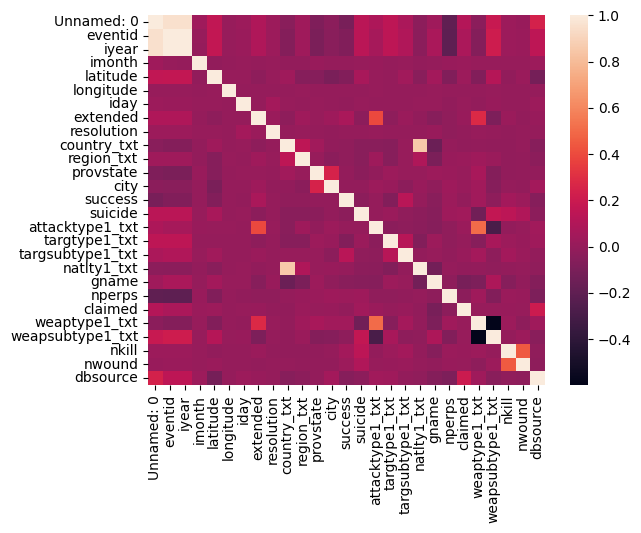

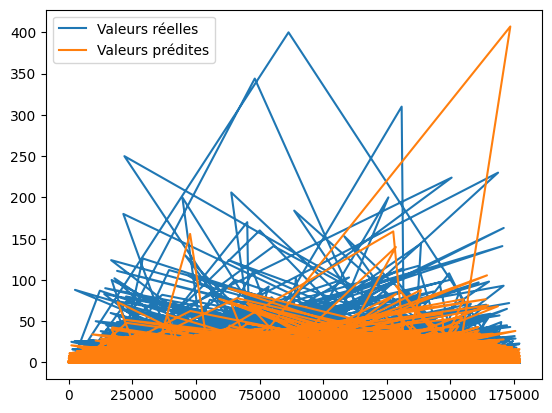

Précision des prédictions pour 'nkill' (seuil = 10%): 12.35%
Précision des prédictions pour 'nwound' (seuil = 10%): 9.80%
Précision: 0.5971255498524786 %


In [81]:

# Test et graphs.
# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Test et graphs.
from sklearn.metrics import r2_score

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100
print("Mean Absolute Percentage Error:", mape)

# Graphique de distribution des erreurs
sns.distplot(y_test - y_pred)
plt.show()

# Graphique de dispersion des erreurs
plt.scatter(y_test, y_pred)
plt.show()
#heatmap
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()



# Graphique de prédiction (par exemple pour 'nkill')
plt.plot(y_test.index, y_test['nkill'], label='Valeurs réelles')
plt.plot(y_test.index, y_pred[:, 0], label='Valeurs prédites')  # Colonne 0 pour 'nkill'
plt.legend()
plt.show()

# Définir un seuil d'erreur acceptable (en pourcentage)
seuil_erreur = 10

# Calculer l'erreur relative pour chaque prédiction
erreurs_relatives = np.abs((y_test - y_pred) / (y_test + 1e-10)) * 100

# Calculer la proportion de prédictions dont l'erreur relative est inférieure au seuil
precision_nkill = np.sum(erreurs_relatives['nkill'] <= seuil_erreur) / len(erreurs_relatives['nkill']) * 100
precision_nwound = np.sum(erreurs_relatives['nwound'] <= seuil_erreur) / len(erreurs_relatives['nwound']) * 100

print(f"Précision des prédictions pour 'nkill' (seuil = {seuil_erreur}%): {precision_nkill:.2f}%") 
print(f"Précision des prédictions pour 'nwound' (seuil = {seuil_erreur}%): {precision_nwound:.2f}%")

# Calculer la précision du modèle en pourcentage
precision = rf.score(X_test, y_test) * 100
print("Précision:", precision, "%")


#### Deuxième modèle de prédiction, une régression logistique visant à prédire le pays dans lequel l'attaque a eu lieu

In [82]:
#Régression logistique pour prédire le pays dans lequel l'attaque a eu lieu

# Sélectionner les colonnes pour l'entrée (X) et la sortie (y)

X= data.drop(['country_txt'], axis=1)
y= data['country_txt']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prédictions
y_pred = lr.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Rapport de classification
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Test et graphs.
# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Test et graphs.
from sklearn.metrics import r2_score

Accuracy: 0.136590735879414
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2477
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00       538
           3       0.00      0.00      0.00        90
           5       0.00      0.00      0.00       159
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        47
          12       0.00      0.00      0.00       302
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         

c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134

### Réseau de neurones visant à prédire le nombre de morts et de blessés dans une attaque

Mean Squared Error: 222.25826381862157
Mean Absolute Error: 4.731787557282393
R-squared: -0.028465637059675863
Root Mean Squared Error: 14.908328672880188


c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


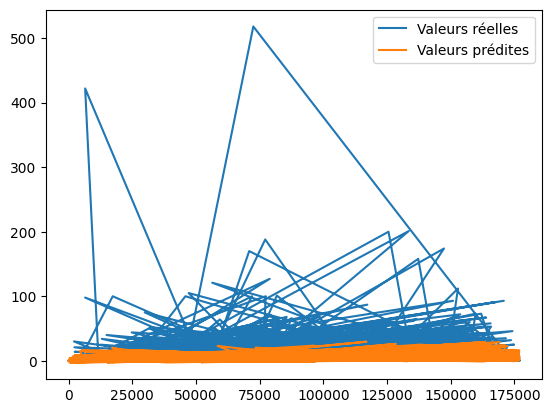

Précision des prédictions pour 'nkill' (seuil = 10%): 3.25%
Précision des prédictions pour 'nwound' (seuil = 10%): 2.21%
Précision: -2.8465637059675863 %


In [83]:
# Nouvelle approche, avec sélection de variables, puis réseau de neurones pour la prédiction du nombre de victimes (nkill et nwound)

# Sélectionner les colonnes pour l'entrée (X) et la sortie (y), en évitant les données négatives dans X
data_pos= data[data >= 0].dropna()
X = data_pos.drop(['nkill', 'nwound'], axis=1)
# Get the target variables
y = data_pos[['nkill', 'nwound']]

# Use MultiLabelBinarizer to binarize the target variables
mlb = MultiLabelBinarizer()
y_binarized = mlb.fit_transform(y.values)

# Use SelectKBest to select the best features
X_new = SelectKBest(chi2, k=10).fit_transform(X, y_binarized)

# Normaliser les données
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X_new)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Entraîner le réseau de neurones
mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, y_train)

# Prédictions
y_pred = mlp.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Test et graphs.
from sklearn.metrics import r2_score

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100

# Graphique de prédiction (par exemple pour 'nkill')
plt.plot(y_test.index, y_test['nkill'], label='Valeurs réelles')
plt.plot(y_test.index, y_pred[:, 0], label='Valeurs prédites')  # Colonne 0 pour 'nkill'
plt.legend()
plt.show()

# Définir un seuil d'erreur acceptable (en pourcentage)
seuil_erreur = 10

# Calculer l'erreur relative pour chaque prédiction
erreurs_relatives = np.abs((y_test - y_pred) / (y_test + 1e-10)) * 100

# Calculer la proportion de prédictions dont l'erreur relative est inférieure au seuil
precision_nkill = np.sum(erreurs_relatives['nkill'] <= seuil_erreur) / len(erreurs_relatives['nkill']) * 100
precision_nwound = np.sum(erreurs_relatives['nwound'] <= seuil_erreur) / len(erreurs_relatives['nwound']) * 100

print(f"Précision des prédictions pour 'nkill' (seuil = {seuil_erreur}%): {precision_nkill:.2f}%")
print(f"Précision des prédictions pour 'nwound' (seuil = {seuil_erreur}%): {precision_nwound:.2f}%")

# Calculer la précision du modèle en pourcentage
precision = mlp.score(X_test, y_test) * 100
print("Précision:", precision, "%")


### Classification par random forest visant à prédire le type d'arme utilisée dans une attaque

In [84]:
#Prédiction du type d'arme utilisée pour l'attaque en fonction du reste des données par forêt aléatoire

# Sélectionner les colonnes pour l'entrée (X) et la sortie (y)
X = data.drop(['weaptype1_txt'], axis=1)
X=X.drop(['weapsubtype1_txt'], axis=1)
X=X.drop({'attacktype1_txt'}, axis=1)

y = data['weaptype1_txt']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de forêt aléatoire
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Rapport de classification
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Accuracy: 0.7807886640133231
Confusion Matrix:
 [[    2     0     3     0     2     0     0     0     0     0     0     0]
 [    0    17    32     0     4     2     0     0     0     0     1     0]
 [    0     0 16367     0  1453   155    13     0     0     1    95     0]
 [    0     0     4     0     1     0     0     0     0     0     0     0]
 [    0     0  2215     0  8817    70    41     0     0     0   263     2]
 [    0     1   670     0   195  1235     9     1     0     0    32     0]
 [    0     0   138     0   381    25   186     0     0     0    25     1]
 [    0     1     7     0     6     4     0     4     0     0     2     0]
 [    0     0     1     0     0     0     0     0     2     0     0     0]
 [    0     0    21     0     3     6     0     0     0     6     4     0]
 [    0     1   695     0  1097    38    22     2     0     0  1023     0]
 [    0     0     7     0     7     3     4     0     0     0     0     2]]
Classification Report:
               precision    

c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [85]:

def decode_predictions(y, column_name):
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    y_decoded = np.zeros_like(y, dtype=object)
    y_decoded[:, 0] = label_encoders[column_name].inverse_transform(y[:, 0].astype(int))
    return y_decoded.squeeze()

# Afficher les 10 premières prédictions
print("Prédictions:", decode_predictions(y_pred, 'weaptype1_txt')[:10])

# Afficher les 10 premières valeurs réelles
print("Valeurs réelles:", decode_predictions(y_test.values, 'weaptype1_txt')[:10])


# Taux de bonnes prédictions
accuracy = accuracy_score(y_test, y_pred)

print("Taux de bonnes prédictions:", accuracy)


Prédictions: ['Firearms' 'Firearms' 'Explosives' 'Firearms' 'Firearms' 'Explosives'
 'Explosives' 'Explosives' 'Explosives' 'Incendiary']
Valeurs réelles: ['Firearms' 'Explosives' 'Explosives' 'Explosives' 'Firearms' 'Firearms'
 'Explosives' 'Explosives' 'Explosives' 'Incendiary']
Taux de bonnes prédictions: 0.7807886640133231


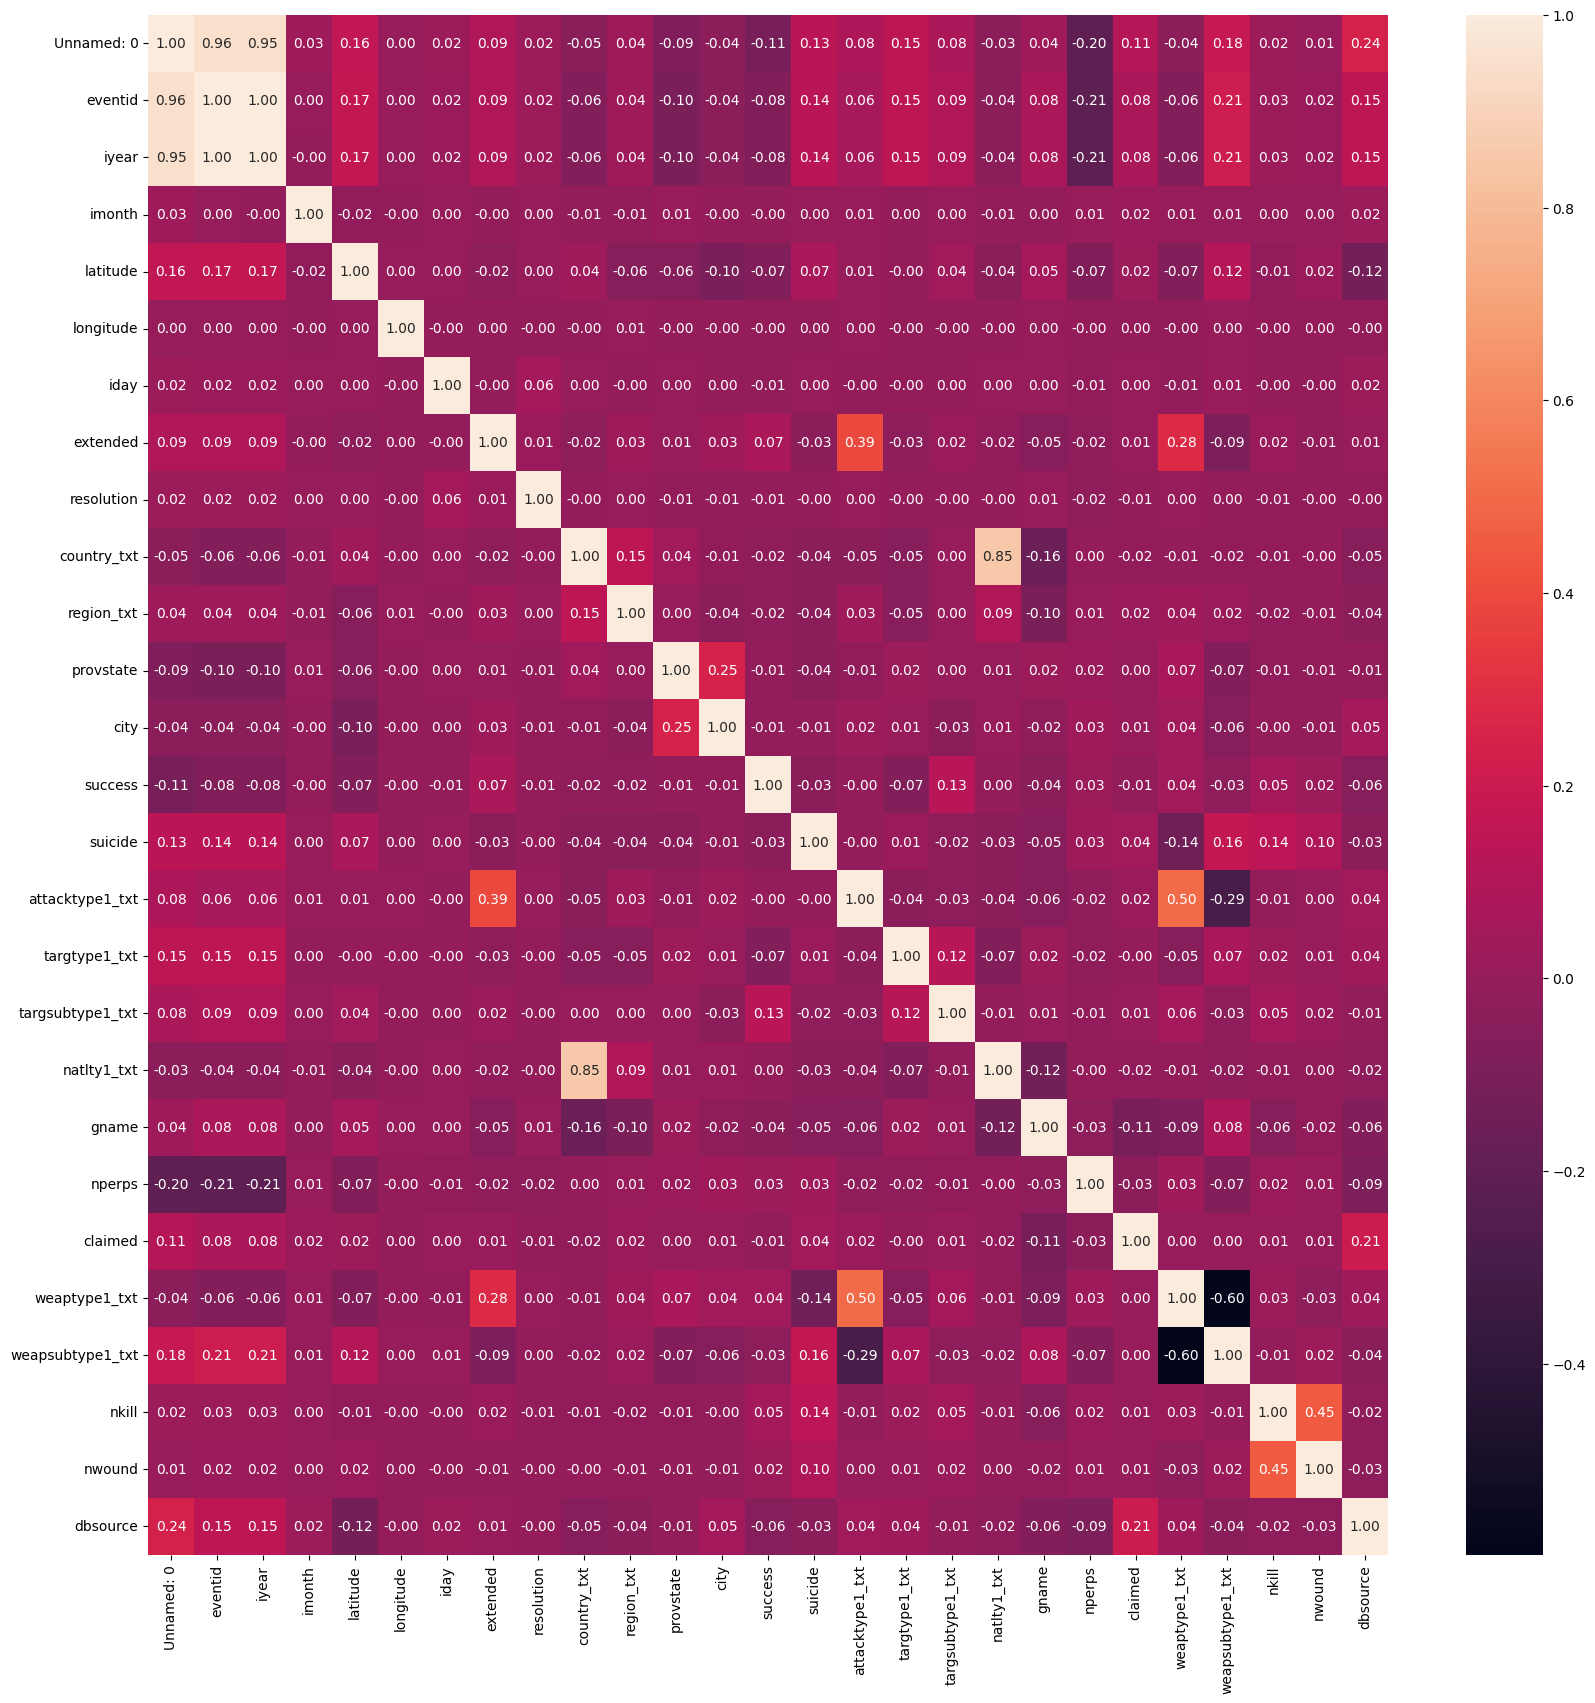

In [86]:
# Affiche la matrice de corrélation entre les variables utilisées précédemment
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

In [87]:
#Prédiction de l'arme utilisée pour l'attaque en fonction du reste des données par forêt aléatoire

# Sélectionner les colonnes pour l'entrée (X) et la sortie (y)
X = data.drop(['weapsubtype1_txt'], axis=1)
y = data['weapsubtype1_txt']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de forêt aléatoire
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# # Évaluer le modèle
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Matrice de confusion
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# # Rapport de classification
# cr = classification_report(y_test, y_pred)
# print("Classification Report:\n", cr)

In [88]:

def decode_predictions(y, column_name):
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    y_decoded = np.zeros_like(y, dtype=object)
    y_decoded[:, 0] = label_encoders[column_name].inverse_transform(y[:, 0].astype(int))
    return y_decoded.squeeze()

# Afficher les 10 premières prédictions
print("Prédictions:", decode_predictions(y_pred, 'weapsubtype1_txt')[:10])

# Afficher les 10 premières valeurs réelles
print("Valeurs réelles:", decode_predictions(y_test.values, 'weapsubtype1_txt')[:10])


# Taux de bonnes prédictions
accuracy = accuracy_score(y_test, y_pred)

print("Taux de bonnes prédictions:", accuracy)


Prédictions: ['Unknown Gun Type' 'Unknown Explosive Type' 'Other Explosive Type'
 'Landmine' 'Unknown Gun Type' 'Unknown Gun Type' 'Unknown Explosive Type'
 'Letter Bomb' 'Projectile (rockets, mortars, RPGs, etc.)' 'Arson/Fire']
Valeurs réelles: ['Unknown Gun Type' 'Unknown Explosive Type' 'Other Explosive Type'
 'Landmine' 'Automatic or Semi-Automatic Rifle'
 'Rifle/Shotgun (non-automatic)'
 'Projectile (rockets, mortars, RPGs, etc.)' 'Unknown Explosive Type'
 'Projectile (rockets, mortars, RPGs, etc.)' 'Arson/Fire']
Taux de bonnes prédictions: 0.7825951957546504


### Prédiction des caractéristiques d'une attaque qui aurait lieu en France en 2024

In [89]:
# # Refaire un dataframe "df_france" à partir de Data.csv
# df_france = pd.read_csv('Data.csv')
# df_france = df_france[df_france['country_txt'] == 'France']

# # On ne garde que les colonnes qui nous intéressent
# df_france = df_france[['eventid','iyear','imonth','latitude','longitude','iday','extended','provstate','city','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','gname','nperps','claimed','weaptype1_txt','weapsubtype1_txt','nkill','nwound']]

C:\Users\diasa\AppData\Local\Temp\ipykernel_12740\1878045522.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_france = pd.read_csv('Data.csv')


In [90]:
# # Visualisation des données manquantes
# #print (df_france.isna().sum()/len(df_france)*100)

# # Passer 'claimed' à 0 quand la valeur est manquante 
# df_france['claimed'].fillna(0,inplace=True)
# #Passer 'nperps' à 1 quand la valeur est manquante
# df_france['nperps'].fillna(1,inplace=True)

# #Passer 'targsubtype1_txt', 'natlty1_txt' et 'weapsubtype1_txt' à 'Unknown' quand NaN
# df_france['targsubtype1_txt'].fillna('Unknown',inplace=True)
# df_france['natlty1_txt'].fillna('Unknown',inplace=True)
# df_france['weapsubtype1_txt'].fillna('Unknown',inplace=True)

# # Remplacement des nkill et nwound manquants par la moyenne
# df_france['nkill'].fillna(df_france['nkill'].sum()/len(df_france),inplace=True)
# df_france['nwound'].fillna(df_france['nwound'].sum()/len(df_france),inplace=True)

# #Vérification du traitement des données manquantes
# print (df_france.isna().sum()/len(df_france)*100)

# # Drop le reste des nan
# df_france.dropna(inplace=True)



eventid             0.000000
iyear               0.000000
imonth              0.000000
latitude            0.779799
longitude           0.779799
iday                0.000000
extended            0.000000
provstate           0.000000
city                0.000000
success             0.000000
suicide             0.000000
attacktype1_txt     0.000000
targtype1_txt       0.000000
targsubtype1_txt    0.000000
natlty1_txt         0.000000
gname               0.000000
nperps              0.000000
claimed             0.000000
weaptype1_txt       0.000000
weapsubtype1_txt    0.000000
nkill               0.000000
nwound              0.000000
dtype: float64


In [91]:
# label_encoders_france = {}
# for col in df_france.columns:
#     if df_france[col].dtype == 'object':
#         # Création d'un label encoder pour la colonne, sauvegarde dans le dictionnaire
#         label_encoders_france[col] = LabelEncoder()
#         # Entraînement du label encoder sur les données de la colonne
#         label_encoders_france[col].fit(df_france[col].astype(str))
#         # Remplacement des données de la colonne par les données encodées
#         df_france[col] = label_encoders_france[col].transform(df_france[col].astype(str))


In [92]:
# # Création du modèle de prédiction qui va nous permettre de donner les caractéristiques les plus probables d'une attaque terroriste en France en 2024
# # Sélectionner les colonnes pour l'entrée (X) et la sortie (y)
# # X contient seulement les colonnes imonth et iyear
# X = df_france[['imonth','iyear']]
# y = df_france.drop((['iyear','imonth']), axis=1)

# # Diviser les données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Entraîner le modèle de forêt aléatoire
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# # Prédictions
# y_pred = rf.predict(X_test)

# # Évaluer le modèle
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\multiclass.py:357: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


ValueError: Unknown label type: 'continuous-multioutput'